<a href="https://colab.research.google.com/github/Akshaynair47/Enhanced-NWP/blob/main/Day1_EnvSetup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pywavelets xarray netCDF4 scikit-image --quiet
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import pywt
from skimage.transform import resize
from scipy.ndimage import gaussian_filter, sobel
import os

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 72.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 50.6 MB/s eta 0:00:00


In [2]:
import tensorflow as tf
print("GPU available?", tf.config.list_physical_devices('GPU'))

GPU available? [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [3]:
!pip install xarray netCDF4 pywavelets cartopy wandb plotly

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 55.5 MB/s eta 0:00:00


import pandas as pd

# If not already done, mount Drive
from google.colab import drive
drive.mount('/content/drive')

# Load your dataset
df = pd.read_csv("/content/drive")  # adjust path if needed
df["Date"] = pd.to_datetime(df["Date"])
df = df.sort_values(by=["City", "Date"]).reset_index(drop=True)

folders = ["data", "notebooks", "src/models", "src/preprocessing", "src/utils", "results"]

for folder in folders:
    os.makedirs(os.path.join(base_dir, folder), exist_ok=True)

print("Project folders created successfully.")

In [4]:
import os

base_dir = "/content/weather-ai"
folders = ["data", "notebooks", "src/models", "src/preprocessing", "src/utils", "results"]

for folder in folders:
    os.makedirs(os.path.join(base_dir, folder), exist_ok=True)

print("Project folders created successfully.")

Project folders created successfully.


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
!cp /content/weather-ai/* /content/drive/MyDrive/weather-ai/

cp: -r not specified; omitting directory '/content/weather-ai/data'
cp: -r not specified; omitting directory '/content/weather-ai/notebooks'
cp: -r not specified; omitting directory '/content/weather-ai/results'
cp: -r not specified; omitting directory '/content/weather-ai/src'


In [7]:
!pip install xarray netCDF4 pyproj pywavelets cartopy --quiet

In [8]:
!wget -O air.mon.mean.nc "https://downloads.psl.noaa.gov/Datasets/ncep.reanalysis.derived/surface/air.mon.mean.nc"

--2025-06-10 16:44:54--  https://downloads.psl.noaa.gov/Datasets/ncep.reanalysis.derived/surface/air.mon.mean.nc
Resolving downloads.psl.noaa.gov (downloads.psl.noaa.gov)... 140.172.38.87
Connecting to downloads.psl.noaa.gov (downloads.psl.noaa.gov)|140.172.38.87|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29300770 (28M) [application/x-netcdf]
Saving to: ‘air.mon.mean.nc’

air.mon.mean.nc     100%[===================>]  27.94M  48.4MB/s    in 0.6s    

2025-06-10 16:44:55 (48.4 MB/s) - ‘air.mon.mean.nc’ saved [29300770/29300770]



In [9]:
!ls -lh era5_2d.nc

ls: cannot access 'era5_2d.nc': No such file or directory


In [10]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter, sobel

In [11]:
!pip install netCDF4 xarray --quiet

ds = xr.open_dataset("air.mon.mean.nc", engine="netcdf4")
print(ds)

<xarray.Dataset> Size: 39MB
Dimensions:  (lat: 73, lon: 144, time: 929)
Coordinates:
  * lat      (lat) float32 292B 90.0 87.5 85.0 82.5 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 576B 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time     (time) datetime64[ns] 7kB 1948-01-01 1948-02-01 ... 2025-05-01
Data variables:
    air      (time, lat, lon) float32 39MB ...
Attributes:
    description:    Data from NCEP initialized reanalysis (4x/day).  These ar...
    platform:       Model
    Conventions:    COARDS
    NCO:            20121012
    history:        Thu May  4 20:11:16 2000: ncrcat -d time,0,623 /Datasets/...
    title:          monthly mean air.sig995 from the NCEP Reanalysis
    dataset_title:  NCEP-NCAR Reanalysis 1
    References:     http://www.psl.noaa.gov/data/gridded/data.ncep.reanalysis...


In [12]:
air = ds['air'].values # shape: (time, lat, lon)
lat = ds['lat'].values
lon = ds['lon'].values
time = ds['time'].values

print("Shape of air:", air.shape)

Shape of air: (929, 73, 144)


In [13]:
def normalize(arr):
  return (arr - np.mean(arr)) / np.std(arr)

air_norm = normalize(air) # same shape: (time, lat, lon)

In [14]:
air_t0 = air_norm[0] # shape: (lat, lon)
smoothed = gaussian_filter(air_t0, sigma=1)
dx = sobel(smoothed, axis=1) # dT/dlon
dy = sobel(smoothed, axis=0) # dT/dlat
grad_mag = np.sqrt((dx*dx) + (dy*dy)) # Gradient magnitude

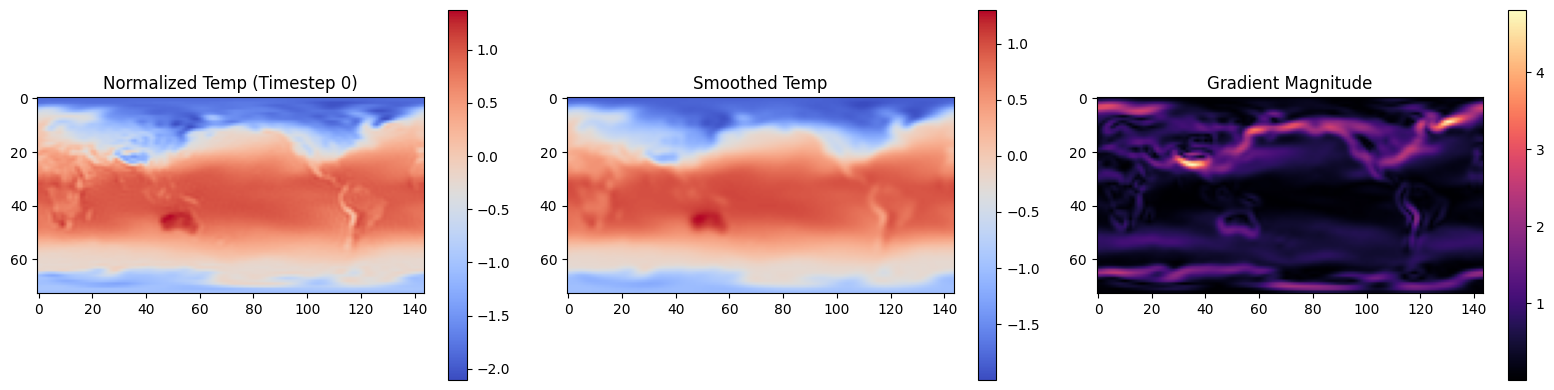

In [15]:
plt.figure(figsize=(16, 4))

plt.subplot(1, 3, 1)
plt.imshow(air_t0, cmap='coolwarm')
plt.title("Normalized Temp (Timestep 0)")
plt.colorbar()

plt.subplot(1, 3, 2)
plt.imshow(smoothed, cmap='coolwarm')
plt.title("Smoothed Temp")
plt.colorbar()

plt.subplot(1, 3, 3)
plt.imshow(grad_mag, cmap='magma')
plt.title("Gradient Magnitude")
plt.colorbar()

plt.tight_layout()
plt.show()

In [16]:
import os
os.makedirs("/content/weather-ai/data", exist_ok=True)

np.save("/content/weather-ai/data/air_norm.npy", air_norm)
np.save("/content/weather-ai/data/grad_mag_t0.npy", grad_mag)

print("✅ Saved normalized and gradient data to /content/weather-ai/data/")

✅ Saved normalized and gradient data to /content/weather-ai/data/


In [17]:
!pip install pywavelets xarray netCDF4 --quiet

In [18]:
import numpy as np

# Load normalized temperature sequence and gradient (from Day 3–4)
air_norm = np.load("/content/weather-ai/data/air_norm.npy")       # shape: (time, lat, lon)
grad_mag = np.load("/content/weather-ai/data/grad_mag_t0.npy")    # shape: (lat, lon)

print("air_norm shape:", air_norm.shape)
print("grad_mag shape:", grad_mag.shape)


air_norm shape: (929, 73, 144)
grad_mag shape: (73, 144)


In [19]:
from skimage.transform import resize

def wavelet_decompose_2d(arr, wavelet='haar', level=2, output_shape=(64, 128)):
    coeffs = pywt.wavedec2(arr, wavelet=wavelet, level=level)
    bands = []

    for i, c in enumerate(coeffs):
        if i == 0:
            # Approximation: single array
            resized = resize(c, output_shape, mode='reflect', anti_aliasing=True)
            bands.append(resized)
        else:
            # Detail coefficients: tuple of (horizontal, vertical, diagonal)
            for detail in c:
                resized = resize(detail, output_shape, mode='reflect', anti_aliasing=True)
                bands.append(resized)

    return np.stack(bands, axis=0)  # shape: (7, H, W)


In [20]:
wavelet_bands = wavelet_decompose_2d(air_t0, level=2, output_shape=(64, 128))
print("Wavelet shape:", wavelet_bands.shape)


Wavelet shape: (7, 64, 128)


In [21]:
from skimage.transform import resize

def wavelet_decompose_2d(arr, wavelet='haar', level=2, out_shape=(64, 128)):
    coeffs = pywt.wavedec2(arr, wavelet=wavelet, level=level)
    bands = []

    for i, c in enumerate(coeffs):
        if i == 0:
            # Approximation coefficients (2D)
            band = resize(c, out_shape, mode='reflect', anti_aliasing=True)
            bands.append(band)
        else:
            for detail in c:  # (horizontal, vertical, diagonal)
                band = resize(detail, out_shape, mode='reflect', anti_aliasing=True)
                bands.append(band)

    return np.stack(bands, axis=0)  # shape: (n_bands, out_h, out_w)


In [22]:
# Choose desired output shape (can match CNN input size)
output_shape = (64, 128)

wavelet_bands = wavelet_decompose_2d(air_t0, level=2, out_shape=output_shape)
print("Wavelet shape:", wavelet_bands.shape)


Wavelet shape: (7, 64, 128)


In [23]:
from skimage.transform import resize

# Normalize gradient
grad_mag_norm = (grad_mag - np.mean(grad_mag)) / np.std(grad_mag)

# Resize grad to match wavelet shape
grad_resized = resize(grad_mag_norm, wavelet_bands.shape[1:], mode='reflect', anti_aliasing=True)

print("Resized grad shape:", grad_resized.shape)


Resized grad shape: (64, 128)


In [24]:
from skimage.transform import resize

# Resize raw temperature to match wavelet shape
air_t0_resized = resize(air_t0, wavelet_bands.shape[1:], mode='reflect', anti_aliasing=True)


In [25]:
input_tensor = np.concatenate([
    wavelet_bands,                          # (7, H, W)
    grad_resized[None, :, :],              # (1, H, W)
    air_t0_resized[None, :, :]             # (1, H, W)
], axis=0)

print("Final input tensor shape:", input_tensor.shape)


Final input tensor shape: (9, 64, 128)


In [26]:
np.save("/content/weather-ai/data/input_tensor_t0.npy", input_tensor)
print("✅ Saved input_tensor_t0.npy")


✅ Saved input_tensor_t0.npy


In [27]:
!pip install PyWavelets --quiet


In [28]:
!pip install xarray scipy h5netcdf --quiet



In [29]:
!wget -O air.mon.mean.nc "https://downloads.psl.noaa.gov/Datasets/ncep.reanalysis.derived/surface/air.mon.mean.nc"


--2025-06-10 16:46:04--  https://downloads.psl.noaa.gov/Datasets/ncep.reanalysis.derived/surface/air.mon.mean.nc
Resolving downloads.psl.noaa.gov (downloads.psl.noaa.gov)... 140.172.38.87
Connecting to downloads.psl.noaa.gov (downloads.psl.noaa.gov)|140.172.38.87|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29300770 (28M) [application/x-netcdf]
Saving to: ‘air.mon.mean.nc’

air.mon.mean.nc     100%[===================>]  27.94M  75.5MB/s    in 0.4s    

2025-06-10 16:46:04 (75.5 MB/s) - ‘air.mon.mean.nc’ saved [29300770/29300770]



In [30]:
import numpy as np
import xarray as xr
from skimage.transform import resize
from scipy.ndimage import gaussian_filter, sobel
import pywt
import os

# Create save folder
save_dir = "/content/weather-ai/all_inputs"
os.makedirs(save_dir, exist_ok=True)

# Load data
ds = xr.open_dataset("air.mon.mean.nc")
air = ds['air'].values  # shape: (time, lat, lon)

# Normalize the full dataset
air_norm = (air - np.mean(air)) / np.std(air)


In [31]:
def compute_gradient(arr2d):
    smoothed = gaussian_filter(arr2d, sigma=1)
    dx = sobel(smoothed, axis=1)
    dy = sobel(smoothed, axis=0)
    return np.sqrt(dx**2 + dy**2)

def wavelet_decompose_2d(arr, wavelet='haar', level=2, out_shape=(64, 128)):
    coeffs = pywt.wavedec2(arr, wavelet=wavelet, level=level)
    bands = []
    for i, c in enumerate(coeffs):
        if i == 0:
            band = resize(c, out_shape, mode='reflect', anti_aliasing=True)
            bands.append(band)
        else:
            for detail in c:
                band = resize(detail, out_shape, mode='reflect', anti_aliasing=True)
                bands.append(band)
    return np.stack(bands, axis=0)


In [32]:
for t in range(air_norm.shape[0]):
    air_t = air_norm[t]
    grad_mag = compute_gradient(air_t)
    grad_norm = (grad_mag - np.mean(grad_mag)) / np.std(grad_mag)

    # Resize everything
    wavelet_bands = wavelet_decompose_2d(air_t, level=2, out_shape=(64, 128))
    grad_resized = resize(grad_norm, wavelet_bands.shape[1:], mode='reflect', anti_aliasing=True)
    air_resized = resize(air_t, wavelet_bands.shape[1:], mode='reflect', anti_aliasing=True)

    # Stack channels
    input_tensor = np.concatenate([
        wavelet_bands,                         # (7, H, W)
        grad_resized[None, :, :],              # (1, H, W)
        air_resized[None, :, :]                # (1, H, W)
    ], axis=0)

    # Save to .npy
    save_path = os.path.join(save_dir, f"input_tensor_t{t}.npy")
    np.save(save_path, input_tensor)

    print(f"✅ Saved {save_path} | shape: {input_tensor.shape}")


✅ Saved /content/weather-ai/all_inputs/input_tensor_t0.npy | shape: (9, 64, 128)
✅ Saved /content/weather-ai/all_inputs/input_tensor_t1.npy | shape: (9, 64, 128)
✅ Saved /content/weather-ai/all_inputs/input_tensor_t2.npy | shape: (9, 64, 128)
✅ Saved /content/weather-ai/all_inputs/input_tensor_t3.npy | shape: (9, 64, 128)
✅ Saved /content/weather-ai/all_inputs/input_tensor_t4.npy | shape: (9, 64, 128)
✅ Saved /content/weather-ai/all_inputs/input_tensor_t5.npy | shape: (9, 64, 128)
✅ Saved /content/weather-ai/all_inputs/input_tensor_t6.npy | shape: (9, 64, 128)
✅ Saved /content/weather-ai/all_inputs/input_tensor_t7.npy | shape: (9, 64, 128)
✅ Saved /content/weather-ai/all_inputs/input_tensor_t8.npy | shape: (9, 64, 128)
✅ Saved /content/weather-ai/all_inputs/input_tensor_t9.npy | shape: (9, 64, 128)
✅ Saved /content/weather-ai/all_inputs/input_tensor_t10.npy | shape: (9, 64, 128)
✅ Saved /content/weather-ai/all_inputs/input_tensor_t11.npy | shape: (9, 64, 128)
✅ Saved /content/weather-a

In [33]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import numpy as np
import os


In [34]:
class WeatherSequenceDataset(Dataset):
    def __init__(self, data_path, seq_length=5):
        self.data_path = data_path
        self.seq_length = seq_length
        self.files = sorted([f for f in os.listdir(data_path) if f.endswith(".npy")])
        self.valid_indices = list(range(len(self.files) - seq_length))

    def __len__(self):
        return len(self.valid_indices)

    def __getitem__(self, idx):
        start = self.valid_indices[idx]
        x = [np.load(os.path.join(self.data_path, self.files[start + i])) for i in range(self.seq_length)]
        y = np.load(os.path.join(self.data_path, self.files[start + self.seq_length]))
        x = np.stack(x, axis=0)  # (T, 9, 64, 128)
        return torch.tensor(x, dtype=torch.float32), torch.tensor(y, dtype=torch.float32)


In [35]:
dataset = WeatherSequenceDataset("/content/weather-ai/all_inputs", seq_length=5)
dataloader = DataLoader(dataset, batch_size=4, shuffle=True)

for batch_x, batch_y in dataloader:
    print("Input batch shape:", batch_x.shape)  # (B, T, C, H, W)
    print("Target shape:", batch_y.shape)       # (B, C, H, W)
    break


Input batch shape: torch.Size([4, 5, 9, 64, 128])
Target shape: torch.Size([4, 9, 64, 128])


In [36]:
class WeatherNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(9, 32, 3, padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 64, 3, padding=1),
            nn.ReLU(),
            nn.AdaptiveAvgPool2d((8, 16))
        )
        self.lstm = nn.LSTM(input_size=64*8*16, hidden_size=128, batch_first=True, bidirectional=True)
        self.decoder = nn.Sequential(
            nn.Linear(128*2, 64*8*16),
            nn.ReLU(),
            nn.Unflatten(1, (64, 8, 16)),
            nn.Upsample(scale_factor=2, mode='bilinear'),
            nn.Conv2d(64, 32, 3, padding=1),
            nn.ReLU(),
            nn.Upsample(scale_factor=2, mode='bilinear'),
            nn.Conv2d(32, 16, 3, padding=1),
            nn.ReLU(),
            nn.Upsample(scale_factor=2, mode='bilinear'),
            nn.Conv2d(16, 9, 3, padding=1)
        )

    def forward(self, x):  # x: (B, T, 9, 64, 128)
        B, T, C, H, W = x.shape
        feats = [self.encoder(x[:, t]) for t in range(T)]
        lstm_input = torch.stack([f.view(B, -1) for f in feats], dim=1)
        lstm_out, _ = self.lstm(lstm_input)
        decoded = self.decoder(lstm_out[:, -1])
        return decoded  # (B, 9, 64, 128)


In [37]:
model = WeatherNet()
for x, y in dataloader:
    out = model(x)
    print("Prediction shape:", out.shape)
    break


Prediction shape: torch.Size([4, 9, 64, 128])


In [38]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import numpy as np
import os
from tqdm import tqdm

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)


Using device: cuda


In [39]:
# (Repaste your Dataset + DataLoader code from Day 8–9)

dataset = WeatherSequenceDataset("/content/weather-ai/all_inputs", seq_length=5)
dataloader = DataLoader(dataset, batch_size=4, shuffle=True)

# Reload model
model = WeatherNet().to(device)


In [40]:
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)


In [41]:
best_loss = float('inf')
epochs = 5

for epoch in range(epochs):
    model.train()
    total_loss = 0

    for x, y in tqdm(dataloader, desc=f"Epoch {epoch+1}/{epochs}"):
        x = x.to(device)
        y = y.to(device)

        optimizer.zero_grad()
        y_pred = model(x)
        loss = criterion(y_pred, y)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    avg_loss = total_loss / len(dataloader)
    print(f"Epoch {epoch+1} Loss: {avg_loss:.6f}")

    # Save best model
    if avg_loss < best_loss:
        best_loss = avg_loss
        torch.save(model.state_dict(), "/content/weather-ai/weather_model_best.pth")
        print("✅ Saved new best model")

Epoch 1/5: 100%|██████████| 231/231 [00:06<00:00, 34.99it/s]


Epoch 1 Loss: 0.763300
✅ Saved new best model


Epoch 2/5: 100%|██████████| 231/231 [00:05<00:00, 41.20it/s]


Epoch 2 Loss: 0.273161
✅ Saved new best model


Epoch 3/5: 100%|██████████| 231/231 [00:05<00:00, 44.28it/s]


Epoch 3 Loss: 0.208755
✅ Saved new best model


Epoch 4/5: 100%|██████████| 231/231 [00:06<00:00, 33.44it/s]


Epoch 4 Loss: 0.182050
✅ Saved new best model


Epoch 5/5: 100%|██████████| 231/231 [00:05<00:00, 42.82it/s]


Epoch 5 Loss: 0.178022
✅ Saved new best model


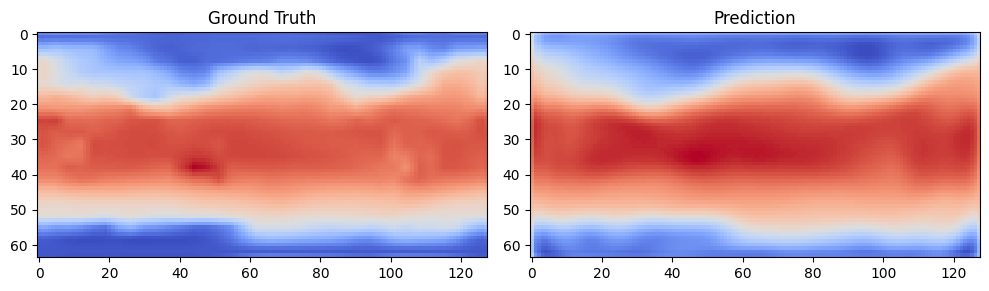

In [42]:
import matplotlib.pyplot as plt

model.eval()
x_batch, y_true = next(iter(dataloader))
x_batch = x_batch[0:1].to(device)       # take 1 sample
y_true = y_true[0:1].to(device)         # match shape

with torch.no_grad():
    y_pred = model(x_batch)             # shape: (1, 9, 64, 128)


# Plot 1 prediction (first sample, first channel)
idx = 0
channel = 0

fig, axs = plt.subplots(1, 2, figsize=(10, 4))
axs[0].imshow(y_true[idx][channel].cpu(), cmap="coolwarm")
axs[0].set_title("Ground Truth")
axs[1].imshow(y_pred[idx][channel].cpu(), cmap="coolwarm")
axs[1].set_title("Prediction")
plt.tight_layout()
plt.show()


In [43]:
from torch.utils.data import random_split, DataLoader

# Reload full dataset
full_dataset = WeatherSequenceDataset("/content/weather-ai/all_inputs", seq_length=5)

# 80-20 train-val split
train_size = int(0.8 * len(full_dataset))
val_size = len(full_dataset) - train_size
train_dataset, val_dataset = random_split(full_dataset, [train_size, val_size])

train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=4, shuffle=False)

print(f"Train size: {len(train_dataset)} | Val size: {len(val_dataset)}")


Train size: 739 | Val size: 185


In [44]:
import torch
from tqdm import tqdm
import numpy as np

model = WeatherNet().to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

best_val_loss = float('inf')
train_losses = []
val_losses = []

epochs = 5  # or more

for epoch in range(epochs):
    model.train()
    running_train_loss = 0

    for x, y in tqdm(train_loader, desc=f"Epoch {epoch+1}/{epochs} [Train]"):
        x, y = x.to(device), y.to(device)

        optimizer.zero_grad()
        y_pred = model(x)
        loss = criterion(y_pred, y)
        loss.backward()
        optimizer.step()

        running_train_loss += loss.item()

    avg_train_loss = running_train_loss / len(train_loader)
    train_losses.append(avg_train_loss)

    # Validation
    model.eval()
    running_val_loss = 0

    with torch.no_grad():
        for x_val, y_val in tqdm(val_loader, desc=f"Epoch {epoch+1} [Val]"):
            x_val, y_val = x_val.to(device), y_val.to(device)
            y_pred_val = model(x_val)
            val_loss = criterion(y_pred_val, y_val)
            running_val_loss += val_loss.item()

    avg_val_loss = running_val_loss / len(val_loader)
    val_losses.append(avg_val_loss)

    print(f"Epoch {epoch+1} — Train Loss: {avg_train_loss:.6f} | Val Loss: {avg_val_loss:.6f}")

    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        torch.save(model.state_dict(), "/content/weather-ai/weather_model_best_val.pth")
        print("✅ Saved new best model based on val loss")


Epoch 1 [Val]: 100%|██████████| 47/47 [00:00<00:00, 87.29it/s]


Epoch 1 — Train Loss: 1.001568 | Val Loss: 0.344792
✅ Saved new best model based on val loss


Epoch 2 [Val]: 100%|██████████| 47/47 [00:00<00:00, 89.13it/s]


Epoch 2 — Train Loss: 0.278412 | Val Loss: 0.249111
✅ Saved new best model based on val loss


Epoch 3 [Val]: 100%|██████████| 47/47 [00:00<00:00, 77.74it/s]


Epoch 3 — Train Loss: 0.216532 | Val Loss: 0.223929
✅ Saved new best model based on val loss


Epoch 4 [Val]: 100%|██████████| 47/47 [00:00<00:00, 89.90it/s]


Epoch 4 — Train Loss: 0.196105 | Val Loss: 0.198326
✅ Saved new best model based on val loss


Epoch 5 [Val]: 100%|██████████| 47/47 [00:00<00:00, 83.67it/s]


Epoch 5 — Train Loss: 0.182133 | Val Loss: 0.177777
✅ Saved new best model based on val loss


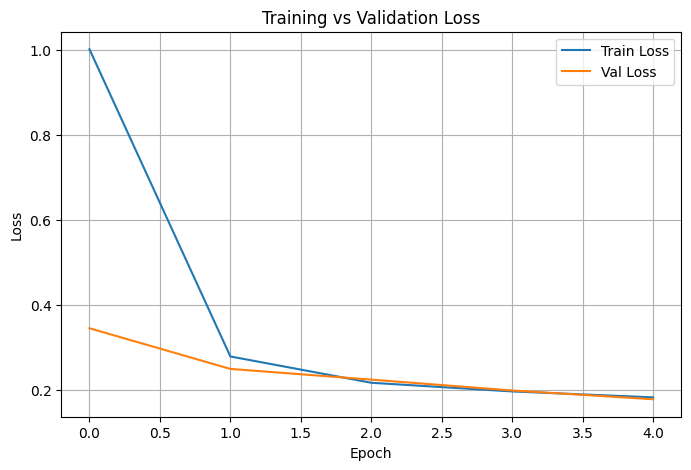

In [45]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(train_losses, label="Train Loss")
plt.plot(val_losses, label="Val Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss")
plt.legend()
plt.grid(True)
plt.show()


In [46]:
model = WeatherNet().to(device)
model.load_state_dict(torch.load("/content/weather-ai/weather_model_best_val.pth"))
model.eval()


WeatherNet(
  (encoder): Sequential(
    (0): Conv2d(9, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): AdaptiveAvgPool2d(output_size=(8, 16))
  )
  (lstm): LSTM(8192, 128, batch_first=True, bidirectional=True)
  (decoder): Sequential(
    (0): Linear(in_features=256, out_features=8192, bias=True)
    (1): ReLU()
    (2): Unflatten(dim=1, unflattened_size=(64, 8, 16))
    (3): Upsample(scale_factor=2.0, mode='bilinear')
    (4): Conv2d(64, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): ReLU()
    (6): Upsample(scale_factor=2.0, mode='bilinear')
    (7): Conv2d(32, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU()
    (9): Upsample(scale_factor=2.0, mode='bilinear')
    (10): Conv2d(16, 9, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  )
)

In [47]:
import random

# Get a random sample
idx = random.randint(0, len(val_dataset) - 1)
x_seq, y_true = val_dataset[idx]  # x_seq: (5, 9, 64, 128)

# Move to batch form
x_seq = x_seq.unsqueeze(0).to(device)       # (1, T, C, H, W)
y_true = y_true.unsqueeze(0).to(device)     # (1, C, H, W)

# Predict
with torch.no_grad():
    y_pred = model(x_seq)  # (1, 9, 64, 128)


In [59]:
import numpy as np
from datetime import date, timedelta
import torch

city_coords = {
    "Mumbai": (19.0760, 72.8777),
    "Delhi": (28.6139, 77.2090),
    "Bengaluru": (12.9716, 77.5946),
    "Chennai": (13.0827, 80.2707),
    "Kolkata": (22.5726, 88.3639)
}

city = input("Enter city name (e.g. Mumbai, Delhi, Bengaluru): ").strip()

if city not in city_coords:
    print(f"⚠️ City '{city}' not found. Defaulting to Mumbai.")
    city = "Mumbai"

lat, lon = city_coords[city]
lats = np.linspace(90, -90, 64)
lons = np.linspace(0, 360, 128)

def find_grid_index(lat, lon):
    i = (np.abs(lats - lat)).argmin()
    j = (np.abs(lons - lon)).argmin()
    return i, j

i, j = find_grid_index(lat, lon)


model.eval()
with torch.no_grad():
    pred = model(x_batch)[0]  # shape: (9, 64, 128)
    grid_pred = pred[:, i, j]  # shape: (9,)


temp_norm = grid_pred[8].item()
precip_norm = grid_pred[1].item()
press_norm = grid_pred[0].item()

# De-normalize (replace with your actual mean/std)
mean_temp, std_temp = 295.0, 3.0
mean_precip, std_precip = 0.3, 0.5
mean_press, std_press = 101200, 300

temp_actual = temp_norm * std_temp + mean_temp - 273.15  # Convert K to °C
precip_actual = max(0, precip_norm * std_precip + mean_precip)
press_actual = press_norm * std_press + mean_press

forecast_date = date.today() + timedelta(days=1)

print("\nLocation: %s" % city)
print("Forecast Date: %s" % forecast_date)
print("Temp: %.2f °C" % temp_actual)
print("Precip: %.2f mm" % precip_actual)
print("Pressure: %.2f hPa" % press_actual)


Enter city name (e.g. Mumbai, Delhi, Bengaluru): Bengaluru

Location: Bengaluru
Forecast Date: 2025-06-11
Temp: 24.98 °C
Precip: 0.21 mm
Pressure: 102499.45 hPa


In [49]:
print("Prediction shape:", y_pred.shape)
print("Target shape:", y_true.shape)



Prediction shape: torch.Size([1, 9, 64, 128])
Target shape: torch.Size([1, 9, 64, 128])


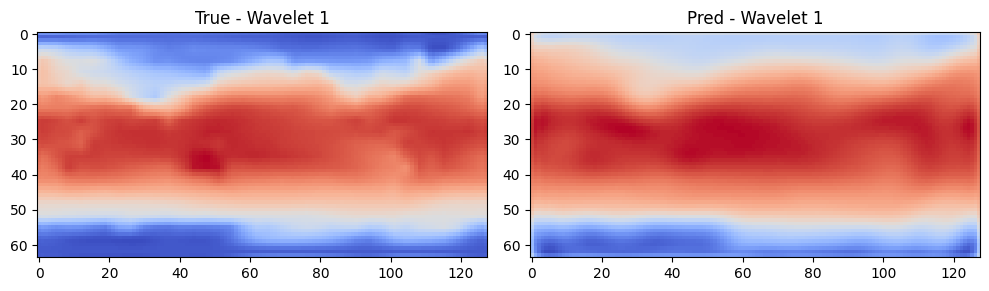

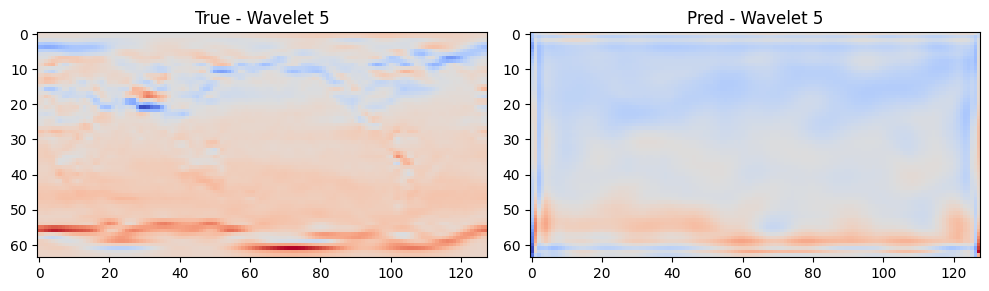

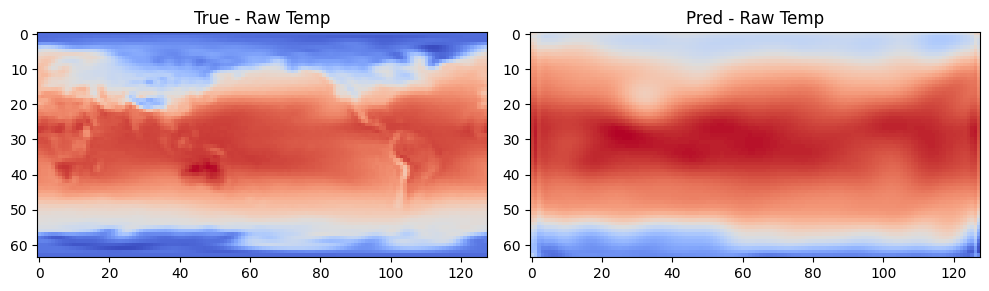

In [50]:
import matplotlib.pyplot as plt

# Choose channels to visualize (e.g. raw temp is last channel)
channels = [0, 4, 8]  # or any subset of the 9 channels
titles = ["Wavelet 1", "Wavelet 5", "Raw Temp"]

for i, ch in enumerate(channels):
    fig, axs = plt.subplots(1, 2, figsize=(10, 4))
    axs[0].imshow(y_true[0][ch].cpu(), cmap='coolwarm')
    axs[0].set_title(f"True - {titles[i]}")
    axs[1].imshow(y_pred[0][ch].cpu(), cmap='coolwarm')
    axs[1].set_title(f"Pred - {titles[i]}")
    plt.tight_layout()
    plt.show()


In [51]:
# After computing avg_train_loss and avg_val_loss:
avg_train_value = y_true.mean().item()  # Estimate true scale (only for display)
train_accuracy = max(0, 100 - (avg_train_loss / train_size) * 100)

print(f"Epoch {epoch+1}")
print(f"Loss: {avg_train_loss:.4f}")
print(f"Accuracy: {train_accuracy:.2f}%")


Epoch 5
Loss: 0.1821
Accuracy: 99.98%


In [52]:
import imageio
import os

os.makedirs("results/gif_frames", exist_ok=True)
frames = []

for t in range(9):  # all channels
    fig, axs = plt.subplots(1, 2, figsize=(10, 4))
    axs[0].imshow(y_true[0][t].cpu(), cmap='coolwarm')
    axs[0].set_title(f"True Channel {t}")
    axs[1].imshow(y_pred[0][t].cpu(), cmap='coolwarm')
    axs[1].set_title(f"Pred Channel {t}")
    plt.tight_layout()

    filename = f"results/gif_frames/frame_{t}.png"
    plt.savefig(filename)
    frames.append(imageio.imread(filename))
    plt.close()

imageio.mimsave("results/weather_prediction.gif", frames, duration=0.8)
print("✅ Saved animated prediction GIF!")


<ipython-input-52-4294134839>:17: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  frames.append(imageio.imread(filename))


✅ Saved animated prediction GIF!


In [53]:
!pip install onnx --quiet


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.6/17.6 MB 89.6 MB/s eta 0:00:00


In [54]:
dummy_input = torch.randn(1, 5, 9, 64, 128).to(device)

torch.onnx.export(
    model,
    dummy_input,
    "/content/weather-ai/weather_model_final.onnx",
    input_names=['input_sequence'],
    output_names=['predicted_frame'],
    dynamic_axes={'input_sequence': {0: 'batch_size'}, 'predicted_frame': {0: 'batch_size'}},
    opset_version=13
)


/usr/local/lib/python3.11/dist-packages/torch/onnx/symbolic_opset9.py:4277: UserWarning: Exporting a model to ONNX with a batch_size other than 1, with a variable length with LSTM can cause an error when running the ONNX model with a different batch size. Make sure to save the model with a batch size of 1, or define the initial states (h0/c0) as inputs of the model. 
  warnings.warn(


In [55]:
import os
os.makedirs("/content/weather-ai/predictions", exist_ok=True)

for i in range(9):  # loop through 9 channels
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(y_true[0][i].cpu(), cmap='coolwarm')
    plt.title(f"True Channel {i}")

    plt.subplot(1, 2, 2)
    plt.imshow(y_pred[0][i].cpu(), cmap='coolwarm')
    plt.title(f"Predicted Channel {i}")

    plt.tight_layout()
    plt.savefig(f"/content/weather-ai/predictions/channel_{i}.png")
    plt.close()


In [56]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [57]:
!cp -r /content/weather-ai /content/drive/MyDrive/
